In [1]:
from tensor import *
from module import *
from keras.datasets import mnist
import keras
import numpy as np

2023-05-24 21:20:17.127011: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 21:20:17.226357: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 21:20:17.227592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 21:20:18.814472: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
train_images = np.asarray(x_train, dtype=np.float32) / 255.0
test_images = np.asarray(x_test, dtype=np.float32) / 255.0
train_images = train_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)
y_train = keras.utils.to_categorical(y_train)

In [3]:
def compute_loss(outputs, labels):
    # Avoid numerical instability by adding a small epsilon value
    epsilon = 1e-10

    # Apply softmax to convert logits into probabilities
    softmax_outputs = np.exp(outputs) / np.sum(np.exp(outputs), axis=1, keepdims=True)

    # Calculate the cross-entropy loss
    loss = -np.sum(labels * np.log(softmax_outputs + epsilon)) / outputs.shape[0]
    return loss

def compute_loss(outputs, labels):
    epsilon = 1e-10
    log_probs =  (outputs.softmax()  + epsilon ).log()
    return -(labels*log_probs).sum(axis = 1).sum() / outputs.shape[0]

def accuracy(outputs, labels):
	batch_size = labels.shape[0]
	acc = np.sum(np.argmax(outputs.data,axis=1) == np.argmax(labels.data,axis=1))/batch_size
	return acc

In [4]:

model = Sequential(Linear(784, 20),ReLU(), Linear(20,10))	
optimizer = SGD(model.parameters(), lr = 0.1, momentum= 0.1)
# criterion = CrossEntropyLoss()
criterion = MSELoss()

In [5]:
batch_size = 32
steps = 2000
Wb = Tensor(np.random.randn(784,10))# new initialized weights for gradient descent
l,a = 0, 0
for step in range(steps):
  
  optimizer.zero_grad()
  ri = np.random.permutation(train_images.shape[0])[:batch_size]
  Xb, yb = Tensor(train_images[ri], label="layer1 input"), Tensor(y_train[ri])
  y_predW = model(Xb)

  loss = criterion(y_predW,yb)
  loss.backward()
  a += accuracy(y_predW,yb)
  l += loss.data

  if step%100==99:
    print(f'step {step} loss {l/100} acc {a/100}')
    l,a = 0,0
  optimizer.step()


step 99 loss 0.09161225338181739 acc 0.198125
step 199 loss 0.0857983513601456 acc 0.489375
step 299 loss 0.07607468573854348 acc 0.5796875
step 399 loss 0.06507570701761528 acc 0.6478125
step 499 loss 0.058209078656265206 acc 0.7040625
step 599 loss 0.05465160480659168 acc 0.71875
step 699 loss 0.0503168171730721 acc 0.7653125
step 799 loss 0.0481238101441741 acc 0.7846875
step 899 loss 0.04536302557768291 acc 0.8028125
step 999 loss 0.04361743688478488 acc 0.8203125
step 1099 loss 0.042064821968344886 acc 0.816875
step 1199 loss 0.040496806991438324 acc 0.8440625
step 1299 loss 0.039617343755079526 acc 0.8453125
step 1399 loss 0.03739835633896698 acc 0.86125
step 1499 loss 0.03577913119807199 acc 0.8671875
step 1599 loss 0.03570736906903457 acc 0.858125
step 1699 loss 0.03369573365861615 acc 0.86625
step 1799 loss 0.03326893356362113 acc 0.86625
step 1899 loss 0.031543033602087475 acc 0.8796875
step 1999 loss 0.030176410140743286 acc 0.886875


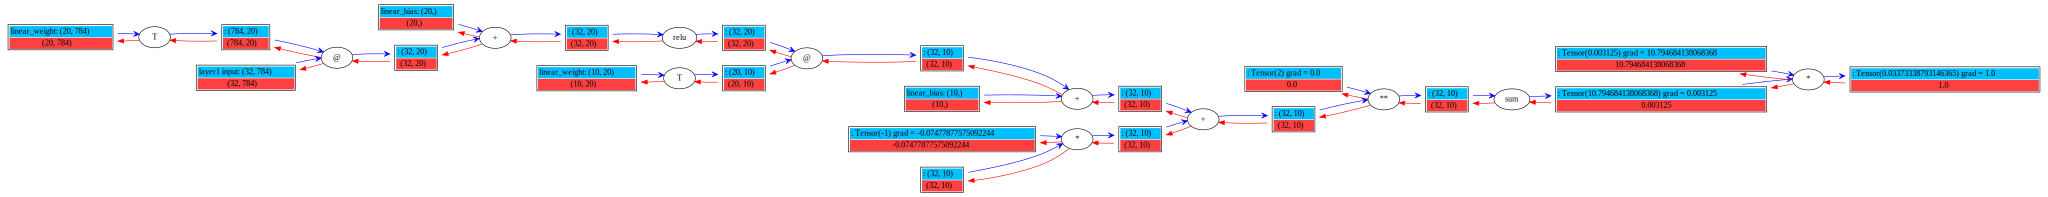

In [7]:
loss.visualize()

In [7]:
loss

Tensor(0.25574545277025185) grad = 1.0

In [8]:
from sklearn.metrics import accuracy_score
print(f'accuracy on test data is {accuracy_score(np.argmax(model(Tensor(test_images)).data,axis = 1),y_test)*100} %')

accuracy on test data is 93.13 %
